# Master Notebook with Combined Results

This notebook combines all relevant trial data and will apply statistical methods to the combined results. 

In [1]:
import sys
sys.path.append('..')

from analyse.prelude import *

config['save_figures'] = True

Include all trials using the phone-racquet system and use the corresponding MOI data:

In [2]:
trials, meta = load_files(['round2', 'round3', 'round4'])

for trial in trials:
    add_angular_momentum(trial, PRQ_I)

[INFO] Processing '../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01/Raw Data.csv' ...
[INFO] Processing '../data/round3/Gyroscope rotation rate 2025-02-14 09-35-02/Raw Data.csv' ...
[INFO] Processing '../data/round3/Gyroscope rotation rate 2025-02-14 10-47-18/Raw Data.csv' ...
[INFO] -> discarding segment 28
[INFO] Processing '../data/round4/Gyroscope rotation rate 2025-02-23 13-16-45/Raw Data.csv' ...
[INFO] -> discarding segment 5
[INFO] Processing '../data/round4/Gyroscope rotation rate 2025-02-23 13-28-34/Raw Data.csv' ...
[INFO] -> discarding segment 1
[INFO] -> discarding segment 2
[INFO] -> discarding segment 3
[INFO] -> discarding segment 4
[INFO] -> discarding segment 5
[INFO] -> discarding segment 6
[INFO] -> discarding segment 10
[INFO] -> discarding segment 40
[INFO] Found 113 trials in 5 files.


## Conservation of Angular Momentum

We will investigate conservation of angular momentum quantitatively (by comparing the initial/final values to determine an average net torque for each trial) and qualitatively (by looking at the total angular momentum over time on the graph).

First the quantitative approach:

avg. tau = -0.04822 ± 0.02587 N⋅m
[INFO] Figure saved to '../figures/torque_histogram_17416486565.svg'


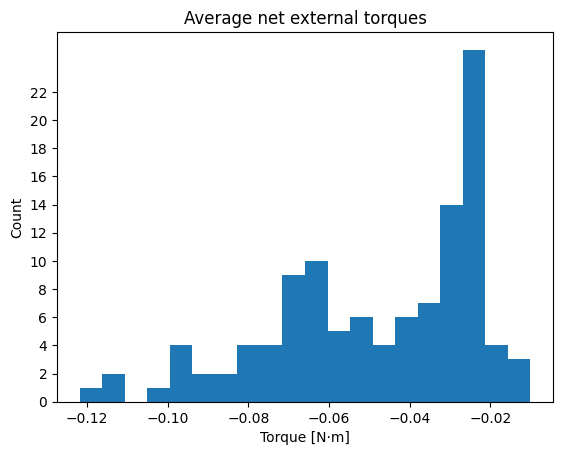

In [3]:
first_row = []
last_row = []
for trial in trials:
    #print(trial.iloc[0])
    first_row.append(trial.iloc[0])
    last_row.append(trial.iloc[-1])

first_row = pd.DataFrame(first_row).reset_index(drop=True)
last_row  = pd.DataFrame(last_row).reset_index(drop=True)

L0 = np.sqrt(first_row['Lx']**2 + first_row['Ly']**2 + first_row['Lz']**2)
Lf = np.sqrt(last_row['Lx']**2 + last_row['Ly']**2 + last_row['Lz']**2)

delta_L = Lf - L0
delta_T = last_row['Time (s)'] - first_row['Time (s)']

M = delta_L / delta_T

# print average results
tau = M.mean()
dtau = M.std()
print(f'avg. tau = {tau:.5f} ± {dtau:.5f} N⋅m')

# make histogram of torques
plt.hist(M, bins=20)
plt.xlabel('Torque [N⋅m]')
plt.ylabel('Count')
plt.title('Average net external torques')
plt.yticks(np.arange(0, 24, 2))
save_figure('torque_histogram')
plt.show()


Now we plot a representative trial to see the trend of angular momentum qualitatively:

In [4]:
# TODO

## Period of Unstable Motion

### From $\omega_0$ (before)

Before filtering any of the data, this is what the trend of period vs initial angular speed looks like:

[WARNING] zero method returned no results
[INFO] Skipping segment 0 of '../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01' ...
Results for segment 1 of ../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01:
-> initial angular speed: 6.44 rad/s
-> period: 1.3699 ± inf seconds (rel. inf%)
Results for segment 2 of ../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01:
-> initial angular speed: 9.82 rad/s
-> period: 1.2657 ± inf seconds (rel. inf%)
Results for segment 3 of ../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01:
-> initial angular speed: 6.76 rad/s
-> period: 1.5361 ± inf seconds (rel. inf%)
Results for segment 4 of ../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01:
-> initial angular speed: 7.96 rad/s
-> period: 1.2863 ± inf seconds (rel. inf%)
Results for segment 0 of ../data/round3/Gyroscope rotation rate 2025-02-14 09-35-02:
-> initial angular speed: 7.72 rad/s
-> period: 1.3259 ± inf seconds (rel. inf%)
Results for segment 1 of ../data/r

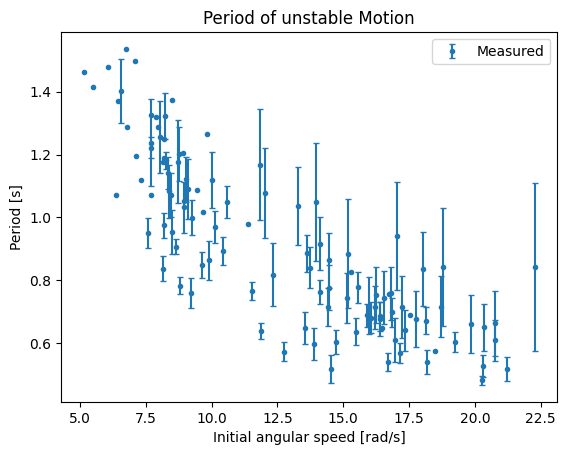

[INFO] Parameter #1: 3.959057e+00 ± 7.4e-01, relative error: 0.19
[INFO] Parameter #2: -2.628648e+00 ± 7.6e-01, relative error: -0.29
[INFO] Parameter #3: 3.255765e-01 ± 3.9e-02, relative error: 0.12
[INFO] Figure saved to '../figures/model_fit_17416486569.svg'


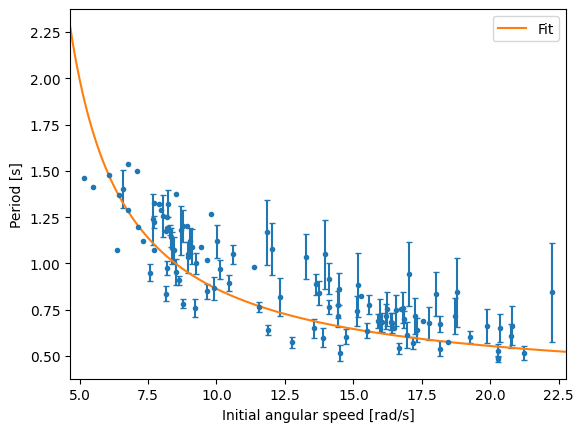

[INFO] Figure saved to '../figures/model_residuals_17416486570.svg'


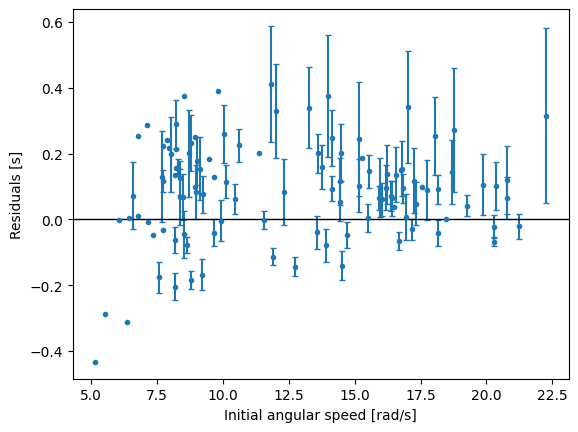

[INFO] chi^2: 4.33


In [5]:
period_data = point_trial_periods(trials, meta, plot_points=False)

plot_speed_vs_period(period_data)

fit_model(period_data)

### From $\omega_0$ (after)

We know that the analytical solution for the period depends on not just the initial angular speed though, but also its direction in relation to the object's moments of inertia. Therefore, we should eliminate trials where the angular velocity strays too far from the intermediate axis. These initial conditions don't line up with the assumptions of our model so we wouldn't expect the model to be accurate in those cases anyways.

In [6]:
# remove trials where (max w1) or (max w3) exceeds (max w2) * threshold
threshold = 1.1
trials = filter_trials(trials, threshold)
print('Trials remaining after filtering:', len(trials))

Trials remaining after filtering: 92


[WARNING] zero method returned no results
[INFO] Skipping segment 0 of '../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01' ...
Results for segment 1 of ../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01:
-> initial angular speed: 6.44 rad/s
-> period: 1.3699 ± inf seconds (rel. inf%)
Results for segment 2 of ../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01:
-> initial angular speed: 9.82 rad/s
-> period: 1.2657 ± inf seconds (rel. inf%)
Results for segment 3 of ../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01:
-> initial angular speed: 6.76 rad/s
-> period: 1.5361 ± inf seconds (rel. inf%)
Results for segment 4 of ../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01:
-> initial angular speed: 7.96 rad/s
-> period: 1.2863 ± inf seconds (rel. inf%)
Results for segment 0 of ../data/round3/Gyroscope rotation rate 2025-02-14 09-35-02:
-> initial angular speed: 7.72 rad/s
-> period: 1.3259 ± inf seconds (rel. inf%)
Results for segment 1 of ../data/r

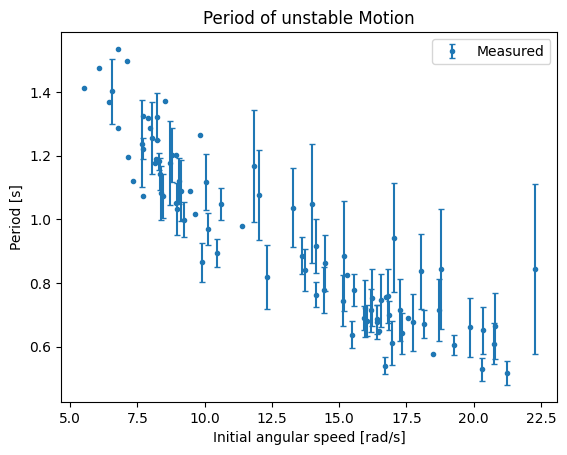

[INFO] Parameter #1: 1.184631e+01 ± 4.2e+00, relative error: 0.35
[INFO] Parameter #2: 2.303202e+00 ± 2.5e+00, relative error: 1.06
[INFO] Parameter #3: 4.734034e-02 ± 1.4e-01, relative error: 2.95
[INFO] Figure saved to '../figures/model_fit_17416486573.svg'


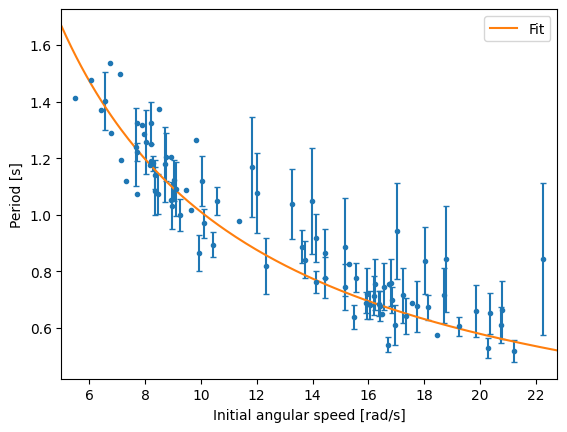

[INFO] Figure saved to '../figures/model_residuals_17416486576.svg'


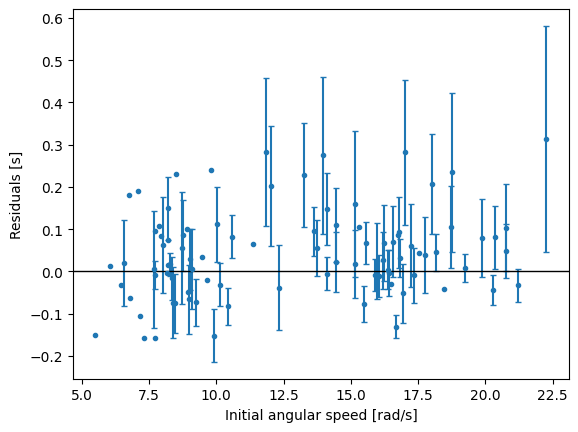

[INFO] chi^2: 1.08


In [7]:
period_data = point_trial_periods(trials, meta, plot_points=False)

plot_speed_vs_period(period_data)

fit_model(period_data)

To be sure, we have fewer data points, but the trend is much clearer now.

## From initial conditions

[INFO] Trial 52: source '../data/round2/Gyroscope rotation rate 2025-01-23 18-29-01' #0
[INFO] Comment: Intermediate axis rotation
[INFO] Figure saved to '../figures/trial_52_17416486795.svg'


<Figure size 640x480 with 0 Axes>

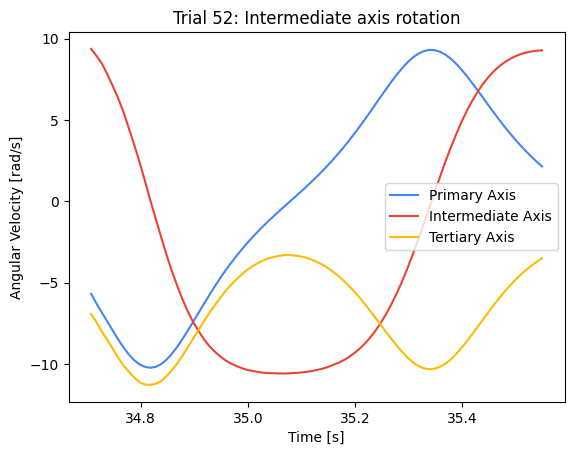

[INFO] Figure saved to '../figures/simulation_17416486797.svg'


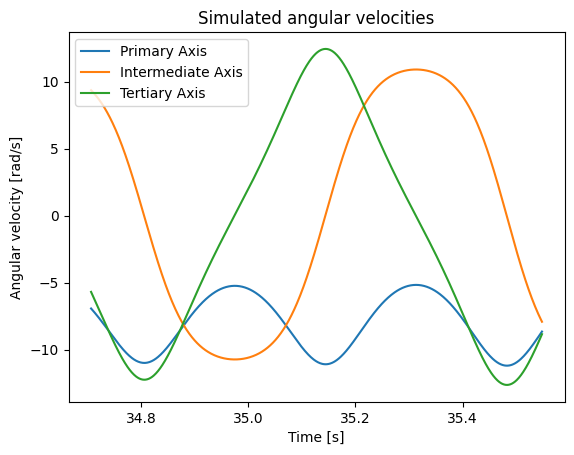

Simulated period: 1.1111111111111112
Real period: 1.3699110470944618
Difference: -0.2587999359833506
-------------------


In [11]:
start = 20
num = 1
for index, trial in enumerate(trials[start:start+num]):
    plot_trials_w([trial], [meta[index]], include_omega=False, manual_is=[index+start])
    simulate(trial, 0.001)
    num_sim_period = simulate_period(trial, 0.001)
    print('Simulated period:', num_sim_period)
    real_period = period_data.iloc[index]['T']
    print('Real period:', real_period)
    print('Difference:', num_sim_period - real_period)
    print('-------------------')

(This next cell sometimes takes 20 seconds or so to run.)

In [9]:
diffs = []
rel_errs = []
for index, period in period_data.iterrows():
    trial = trials[index]
    num_sim_period = simulate_period(trial, 0.0001)
    real_period = period['T']
    diff = np.abs(num_sim_period - real_period)
    diffs.append(diff)
    rel_errs.append(100 * diff / real_period)

print(f'Average difference: {np.mean(diffs):.3e} ± {np.std(diffs):.3e}')
print(f'Average relative error: {np.mean(rel_errs):.3f}')

Average difference: 1.299e-01 ± 1.154e-01
Average relative error: 14.754


[INFO] Figure saved to '../figures/period_error_hist_17416486754.svg'


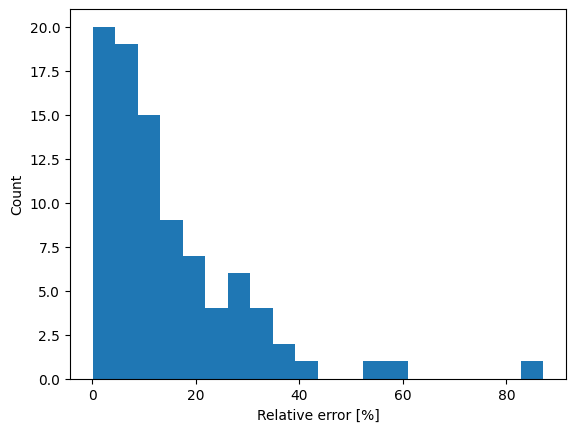

In [10]:
plt.hist(rel_errs, bins=20)
plt.xlabel('Relative error [%]')
plt.ylabel('Count')
plt.plot()
save_figure('period_error_hist')
plt.show()